Modelo cargado correctamente.
Contiene una sola malla.

--- DETALLES DEL MODELO ---
Vértices totales: 664
Caras totales: 330
Aristas totales: 990
Mallas cargadas: 1


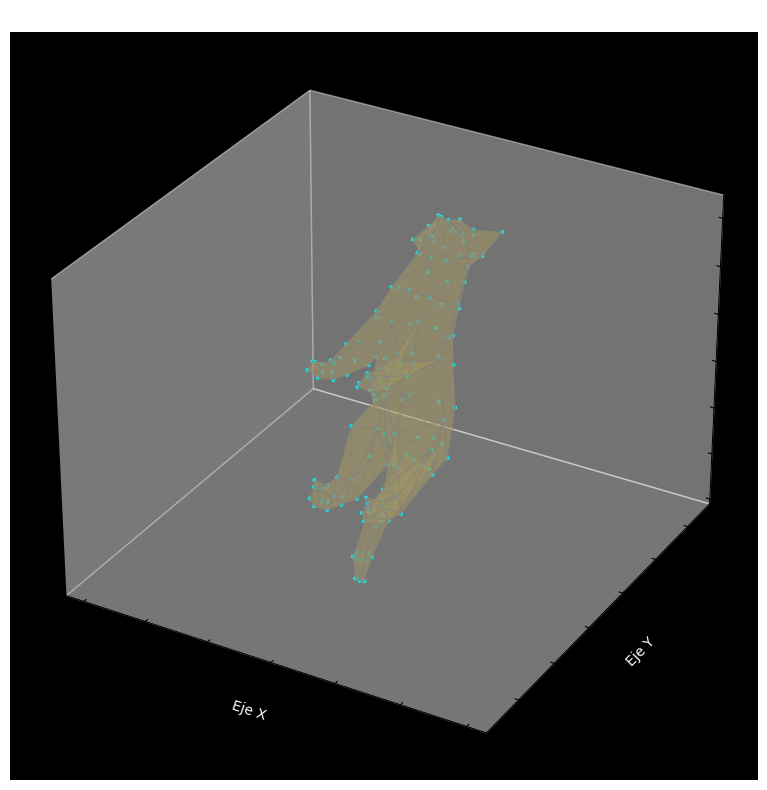

In [ ]:
# === Instalación de librerías necesarias ===
!pip install trimesh --quiet

# === Importación de módulos ===
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import random
from google.colab import files
import os

# === Subir archivo .OBJ ===
modelo3d = "/content/LowPolyCat.obj"


# === Cargar modelo con Trimesh ===
escena = trimesh.load(modelo3d)
print(f"Modelo cargado correctamente.")

# === Unificar mallas ===
mallas = []
if isinstance(escena, trimesh.Scene):
    print("Contiene múltiples geometrías.")
    mallas = list(escena.geometry.values())
else:
    print("Contiene una sola malla.")
    mallas = [escena]

# === Función para crear un color RGB aleatorio ===
def color_aleatorio():
    return np.random.rand(3,)

# === Mostrar datos del modelo ===
v_total, f_total, e_total = 0, 0, 0
for m in mallas:
    v_total += len(m.vertices)
    f_total += len(m.faces)
    e_total += len(m.edges)

print("\n--- DETALLES DEL MODELO ---")
print(f"Vértices totales: {v_total}")
print(f"Caras totales: {f_total}")
print(f"Aristas totales: {e_total}")
print(f"Mallas cargadas: {len(mallas)}")

# === Visualizar modelo 3D con matplotlib ===
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('black')
ax.grid(False)

all_points = []

for mesh in mallas:
    verts = mesh.vertices
    faces = mesh.faces
    all_points.extend(verts)

    # Dibujar vértices
    ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2],
               color='cyan', s=3, alpha=0.5)

    # Dibujar caras
    triangulos = [[verts[i] for i in cara] for cara in faces]
    coleccion = Poly3DCollection(triangulos, alpha=0.3, facecolor=color_aleatorio(), edgecolor='gray')
    ax.add_collection3d(coleccion)

# Centrar vista
all_points = np.array(all_points)
centro = np.mean(all_points, axis=0)
escala = np.max(np.abs(all_points - centro))

ax.set_xlim(centro[0] - escala, centro[0] + escala)
ax.set_ylim(centro[1] - escala, centro[1] + escala)
ax.set_zlim(centro[2] - escala, centro[2] + escala)

ax.set_xlabel("Eje X", color='white')
ax.set_ylabel("Eje Y", color='white')
ax.set_zlabel("Eje Z", color='white')
ax.set_title("Modelo 3D (vista estructural)", color='white')
plt.tight_layout()
plt.show()
